Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Collecting data and processing


In [2]:
#loading csv data into pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
#printing five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#checking the numbers of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#getting info about the data we are dealing with
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missng values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
#getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Checking the correlation between values


In [12]:
# Convert the 'date' column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Exclude the 'date' column when calculating correlation
correlation = gold_data.select_dtypes(include=[float, int]).corr()


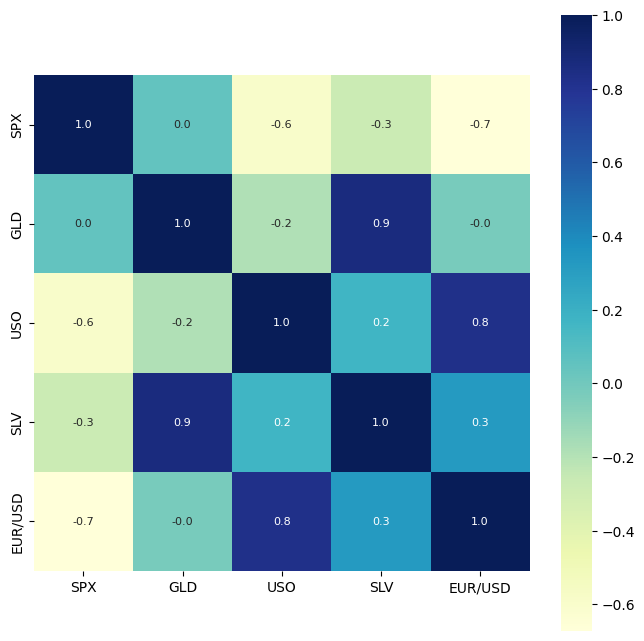

In [16]:
#understanding the data
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlGnBu')
plt.show()


In [18]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


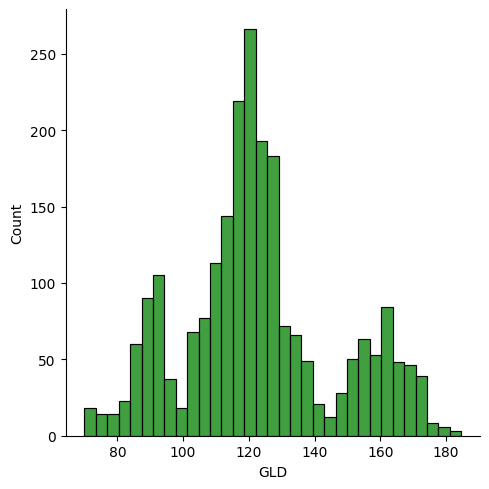

In [21]:
#checking the distribution of the gold price
sns.displot(gold_data["GLD"], color='green')

In [22]:
#Splitting the features and target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

Random Forest Algorithm

single decision tree

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evaluating our model based on test data and train data

In [28]:
#prediction
test_data_predicted = regressor.predict(X_test)


In [29]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_predicted)
print("R squared error is :", error_score)

R squared error is : 0.988886344454608


Comparision using plots

In [30]:
Y_test = list(Y_test)

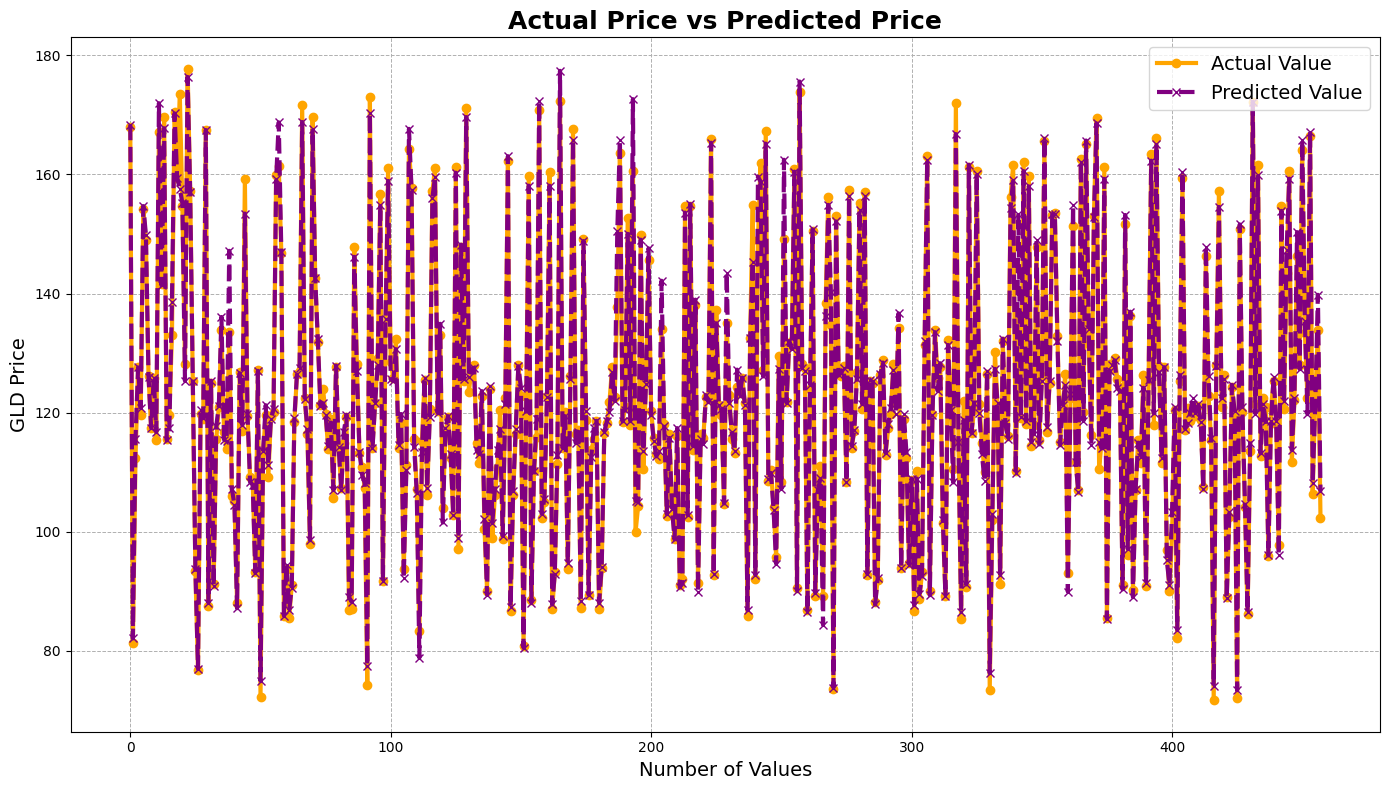

In [34]:
plt.figure(figsize=(14, 8))  # Larger figure size
plt.plot(Y_test, color='orange', label='Actual Value', linewidth=3, linestyle='-', marker='o')  # Change to orange
plt.plot(test_data_predicted, color='purple', label='Predicted Value', linewidth=3, linestyle='--', marker='x')  # Change to purple
plt.title('Actual Price vs Predicted Price', fontsize=18, fontweight='bold')  # Larger and bold title
plt.xlabel('Number of Values', fontsize=14)  # Larger x-axis label
plt.ylabel('GLD Price', fontsize=14)  # Larger y-axis label
plt.legend(loc='best', fontsize=14)  # Larger legend
plt.grid(True, which='both', linestyle='--', linewidth=0.7)  # Thinner grid for clarity
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

